# Multigroup aspatial indexes of segregation

This is an example notebook of functionalities for multigroup aspatial indexes of the *segregation* module. Firstly, we need to import the packages we need:

In [1]:
%%capture

import pysal.lib
from pysal.explore import segregation
import geopandas as gpd

Then it's time to load some data to estimate segregation. We use the data of 2000 Census Tract Data for the metropolitan area of Sacramento, CA, USA. 

We use a geopandas dataframe available in PySAL examples repository.

For more information about the data: https://github.com/pysal/pysal.lib/tree/master/pysal.lib/examples/sacramento2

In [2]:
input_df = gpd.read_file(pysal.lib.examples.get_path("sacramentot2.shp"))
input_df.columns

Index(['FIPS', 'MSA', 'TOT_POP', 'POP_16', 'POP_65', 'WHITE_', 'BLACK_',
       'ASIAN_', 'HISP_', 'MULTI_RA', 'MALES', 'FEMALES', 'MALE1664',
       'FEM1664', 'EMPL16', 'EMP_AWAY', 'EMP_HOME', 'EMP_29', 'EMP_30',
       'EMP16_2', 'EMP_MALE', 'EMP_FEM', 'OCC_MAN', 'OCC_OFF1', 'OCC_INFO',
       'HH_INC', 'POV_POP', 'POV_TOT', 'HSG_VAL', 'FIPSNO', 'POLYID',
       'geometry'],
      dtype='object')

The groups of interest are White, Black, Asian and Hispanic population. Therefore, we create an auxiliary list with only the necessary columns for fitting the index.

In [3]:
groups_list = ['WHITE_', 'BLACK_', 'ASIAN_','HISP_']

We also can plot the spatial distribution of the composition of each of these groups over the tracts of Sacramento:

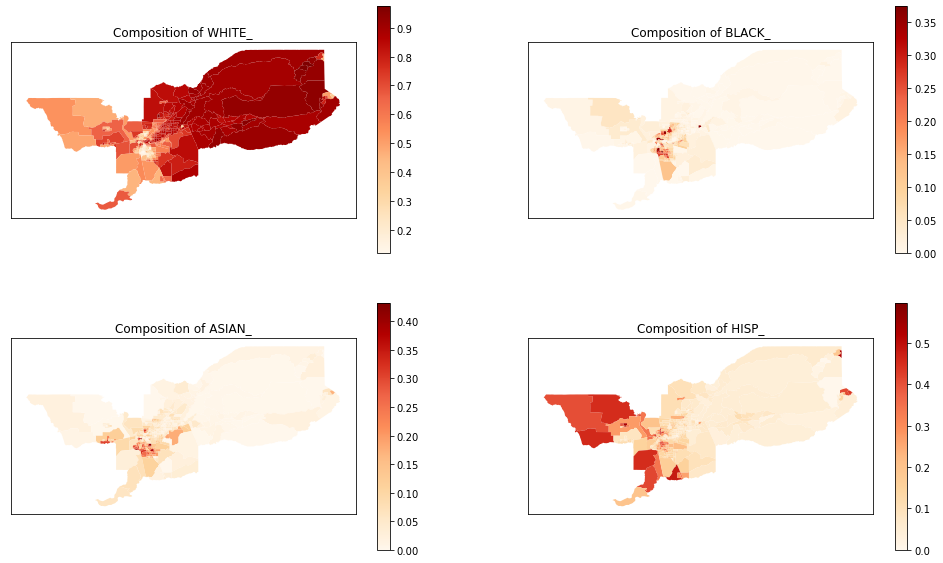

In [4]:
import matplotlib.pyplot as plt

for i in range(len(groups_list)):
    input_df['comp_' + groups_list[i]] = input_df[groups_list[i]] / input_df['TOT_POP']

fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (17, 10))


input_df.plot(column = 'comp_' + groups_list[0],
              cmap = 'OrRd',
              legend = True, ax = axes[0,0])
axes[0,0].set_title('Composition of ' + groups_list[0])
axes[0,0].set_xticks([])
axes[0,0].set_yticks([])
axes[0,0].set_facecolor('white')


input_df.plot(column = 'comp_' + groups_list[1],
              cmap = 'OrRd',
              legend = True, ax = axes[0,1])
axes[0,1].set_title('Composition of ' + groups_list[1])
axes[0,1].set_xticks([])
axes[0,1].set_yticks([])
axes[0,1].set_facecolor('white')


input_df.plot(column = 'comp_' + groups_list[2],
              cmap = 'OrRd',
              legend = True, ax = axes[1,0])
axes[1,0].set_title('Composition of ' + groups_list[2])
axes[1,0].set_xticks([])
axes[1,0].set_yticks([])
axes[1,0].set_facecolor('white')

input_df.plot(column = 'comp_' + groups_list[3],
              cmap = 'OrRd',
              legend = True, ax = axes[1,1])
axes[1,1].set_title('Composition of ' + groups_list[3])
axes[1,1].set_xticks([])
axes[1,1].set_yticks([])
axes[1,1].set_facecolor('white')

# Multigroup Dissimilarity Index

In [5]:
%%capture
from pysal.explore.segregation.aspatial import MultiDissim

In [6]:
index = MultiDissim(input_df, groups_list)
type(index)

segregation.aspatial.multigroup_aspatial_indexes.MultiDissim

In [7]:
index.statistic

0.41340872573177806

# Multigroup Gini Index

In [8]:
%%capture
from pysal.explore.segregation.aspatial import MultiGiniSeg

In [9]:
index = MultiGiniSeg(input_df, groups_list)
type(index)

segregation.aspatial.multigroup_aspatial_indexes.MultiGiniSeg

In [10]:
index.statistic

0.5456349992598081

# Multigroup Normalized Exposure Index

In [11]:
%%capture
from pysal.explore.segregation.aspatial import MultiNormalizedExposure

In [12]:
index = MultiNormalizedExposure(input_df, groups_list)
type(index)

segregation.aspatial.multigroup_aspatial_indexes.MultiNormalizedExposure

In [13]:
index.statistic

0.18821879029994157

# Multigroup Information Theory Index

In [14]:
%%capture
from pysal.explore.segregation.aspatial import MultiInformationTheory

In [15]:
index = MultiInformationTheory(input_df, groups_list)
type(index)

segregation.aspatial.multigroup_aspatial_indexes.MultiInformationTheory

In [16]:
index.statistic

0.1710160297858887

# Multigroup Relative Diversity Index

In [17]:
%%capture
from pysal.explore.segregation.aspatial import MultiRelativeDiversity

In [18]:
index = MultiRelativeDiversity(input_df, groups_list)
type(index)

segregation.aspatial.multigroup_aspatial_indexes.MultiRelativeDiversity

In [19]:
index.statistic

0.15820019878220337

# Multigroup Squared Coefficient of Variation Index

In [20]:
%%capture
from pysal.explore.segregation.aspatial import MultiSquaredCoefficientVariation

In [21]:
index = MultiSquaredCoefficientVariation(input_df, groups_list)
type(index)

segregation.aspatial.multigroup_aspatial_indexes.MultiSquaredCoefficientVariation

In [22]:
index.statistic

0.11875484641127525

# Multigroup Diversity Index

In [23]:
%%capture
from pysal.explore.segregation.aspatial import MultiDiversity

In [24]:
index = MultiDiversity(input_df, groups_list)
type(index)

segregation.aspatial.multigroup_aspatial_indexes.MultiDiversity

In [25]:
index.statistic

0.9733112243997906

In [26]:
# Normalized version of the multigroup diversity index
normalized_index = MultiDiversity(input_df, groups_list, normalized = True)
normalized_index.statistic

0.7020956383415715

# Simpson's Concentration Index (lambda)

In [27]:
%%capture
from pysal.explore.segregation.aspatial import SimpsonsConcentration

In [28]:
index = SimpsonsConcentration(input_df, groups_list)
type(index)

segregation.aspatial.multigroup_aspatial_indexes.SimpsonsConcentration

In [29]:
index.statistic

0.49182413151957904

# Simpson's Interaction Index (I)

In [30]:
%%capture
from pysal.explore.segregation.aspatial import SimpsonsInteraction

In [31]:
index = SimpsonsInteraction(input_df, groups_list)
type(index)

segregation.aspatial.multigroup_aspatial_indexes.SimpsonsInteraction

In [32]:
index.statistic

0.508175868480421

# Multigroup Divergence Index

In [33]:
%%capture
from pysal.explore.segregation.aspatial import MultiDivergence

In [34]:
index = MultiDivergence(input_df, groups_list)
type(index)

segregation.aspatial.multigroup_aspatial_indexes.MultiDivergence

In [35]:
index.statistic

0.16645182134289443